In [1]:
# Import Statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Normalization Cheat Sheet
min_max = lambda x: (x - x.min()) / (x.max() - x.min())
z_score = lambda x: (x - x.mean()) / x.std()

In [2]:
# Assign %pwd to working_dir
working_dir = %pwd

## Reading Pre Processed Data File

In [3]:
# Reading Pre Processed Data File
spotify = pd.read_csv( (working_dir)+"/Data/spotify-pre_processed.csv", delimiter = ",")

In [4]:
# Separate Text Attributes, will be merged with PCA Features later
spotify_object = spotify[spotify.describe(include=[object]).columns]
spotify_object

,artists,id,name,year
0,['Mamie Smith'],0cS0A1fUEUd1EW3FcF8AEI,Keep A Song In Your Soul,1920s
1,"[""Screamin' Jay Hawkins""]",0hbkKFIJm7Z05H8Zl9w30f,I Put A Spell On You,1920s
2,['Mamie Smith'],11m7laMUgmOKqI3oYzuhne,Golfing Papa,1920s
3,['Oscar Velazquez'],19Lc5SfJJ5O1oaxY0fpwfh,True House Music - Xavier Santos & Carlos Gomi...,1920s
4,['Mixe'],2hJjbsLCytGsnAHfdsLejp,Xuniverxe,1920s
...,...,...,...,...
174384,"['DJ Combo', 'Sander-7', 'Tony T']",46LhBf6TvYjZU2SMvGZAbn,The One,2020s
174385,['Alessia Cara'],7tue2Wemjd0FZzRtDrQFZd,A Little More,2020s
174386,['Roger Fly'],48Qj61hOdYmUCFJbpQ29Ob,Together,2020s
174387,['Taylor Swift'],1gcyHQpBQ1lfXGdhZmWrHP,champagne problems,2020s


In [5]:
# Separate Numerical Attributes for Principle Component Analysis
spotify_numerical = spotify[spotify.describe().columns]
spotify_numerical

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,explicit_0,explicit_1,mode_0,mode_1
0,0.991000,0.598,0.030637,0.224,0.000522,0.454545,0.3790,0.741868,0.12,0.0936,0.615900,0.6340,1,0,1,0
1,0.643000,0.852,0.027237,0.517,0.026400,0.454545,0.0809,0.825918,0.07,0.0534,0.356823,0.9500,1,0,1,0
2,0.993000,0.647,0.029792,0.186,0.000018,0.000000,0.5190,0.750168,0.04,0.1740,0.400810,0.6890,1,0,0,1
3,0.000173,0.730,0.078215,0.798,0.801000,0.181818,0.1280,0.825135,0.17,0.0425,0.525640,0.0422,1,0,0,1
4,0.295000,0.704,0.030054,0.707,0.000246,0.909091,0.4020,0.845102,0.02,0.0768,0.501324,0.2990,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,0.792,0.026752,0.866,0.000060,0.545455,0.1780,0.859933,0.00,0.0356,0.517324,0.1860,1,0,1,0
174385,0.795000,0.429,0.026209,0.211,0.000000,0.363636,0.1960,0.756949,0.00,0.0360,0.388942,0.2280,1,0,0,1
174386,0.806000,0.671,0.039977,0.589,0.920000,0.363636,0.1130,0.745549,0.00,0.0282,0.443757,0.7140,1,0,1,0
174387,0.920000,0.462,0.044824,0.240,0.000000,0.000000,0.1130,0.750497,0.69,0.0377,0.703549,0.3200,0,1,0,1


In [6]:
from sklearn.decomposition import PCA

# Function: principleComponentAnalysis
# Accepts:  dataset
# Returns:  top ratios and corresponding feature 
#           names for Principle Component Analysis
def principleComponentAnalysis(data):
    number_of_columns = data.shape[1]
    initial_feature_names = data.columns
        
    for x in range(number_of_columns):
        pca = PCA(n_components = x)
        pca.fit_transform(data)
        pca_ratios = pca.explained_variance_ratio_
        
        # https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
        # block of code for returning corresponding feature names.
        most_important = [np.abs(pca.components_[i]).argmax() for i in range(x)]
        pca_names = [initial_feature_names[most_important[i]] for i in range(x)]
        
        if sum(pca_ratios) >= .85:
            break
    return pca_ratios, pca_names

# Function: screePlot
# Accepts:  dataset
# Returns:  Scree Plot
def screePlot(data):
    number_of_columns = data.shape[1]
    
    # Calculate Eigen Values
    for x in range(number_of_columns):
        pca = PCA(n_components = x)
        pca.fit_transform(data)
        eigen_values = pca.explained_variance_

    total = sum(eigen_values)
    var_exp = [(i/total) for i in sorted(eigen_values, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    
    # Plot Graph
    # https://medium.com/@sercandogan/why-scree-plot-is-important-in-pca-a66cd7dcd624
    plt.plot(cum_var_exp)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');

In [7]:
# Testing principleComponentAnalysis Function
pca_ratios, pca_names = principleComponentAnalysis(spotify_numerical)

In [8]:
# Printing Feature Names
pca_names

['mode_0', 'acousticness', 'explicit_0', 'instrumentalness', 'key', 'valence']

In [9]:
# Printing Ratios
pca_ratios

array([0.34793026, 0.19927666, 0.10308873, 0.0848587 , 0.08181538,
       0.05872435])

### PCA Summary

In [10]:
# PCA Summary
pca_sum = sum(pca_ratios)
pca_length = len(pca_ratios)

print(str(pca_length) + ' Attributes Accounted For ' + "{:.2f}".format(pca_sum) + ' Of The Variance')

6 Attributes Accounted For 0.88 Of The Variance


### Scree Plot

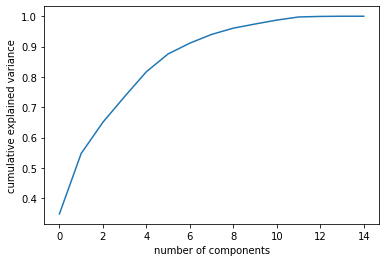

In [11]:
# Scree Plot
screePlot(spotify_numerical)

### Save PCA Features  To Disk

In [12]:
# Save spotify_object into data file
spotify_pca = spotify_object
# Merge new PCA Features into data file
for x in spotify_numerical[pca_names].columns:
    spotify_pca[x] = spotify_numerical[x]
# Save data file to csv    
spotify_pca.to_csv((working_dir)+"/Data/spotify-pca.csv", index = False)
spotify = spotify_pca

<ipython-input-12-69c887f41d6a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_pca[x] = spotify_numerical[x]


In [13]:
spotify

,artists,id,name,year,mode_0,acousticness,explicit_0,instrumentalness,key,valence
0,['Mamie Smith'],0cS0A1fUEUd1EW3FcF8AEI,Keep A Song In Your Soul,1920s,1,0.991000,1,0.000522,0.454545,0.6340
1,"[""Screamin' Jay Hawkins""]",0hbkKFIJm7Z05H8Zl9w30f,I Put A Spell On You,1920s,1,0.643000,1,0.026400,0.454545,0.9500
2,['Mamie Smith'],11m7laMUgmOKqI3oYzuhne,Golfing Papa,1920s,0,0.993000,1,0.000018,0.000000,0.6890
3,['Oscar Velazquez'],19Lc5SfJJ5O1oaxY0fpwfh,True House Music - Xavier Santos & Carlos Gomi...,1920s,0,0.000173,1,0.801000,0.181818,0.0422
4,['Mixe'],2hJjbsLCytGsnAHfdsLejp,Xuniverxe,1920s,1,0.295000,0,0.000246,0.909091,0.2990
...,...,...,...,...,...,...,...,...,...,...
174384,"['DJ Combo', 'Sander-7', 'Tony T']",46LhBf6TvYjZU2SMvGZAbn,The One,2020s,1,0.009170,1,0.000060,0.545455,0.1860
174385,['Alessia Cara'],7tue2Wemjd0FZzRtDrQFZd,A Little More,2020s,0,0.795000,1,0.000000,0.363636,0.2280
174386,['Roger Fly'],48Qj61hOdYmUCFJbpQ29Ob,Together,2020s,1,0.806000,1,0.920000,0.363636,0.7140
174387,['Taylor Swift'],1gcyHQpBQ1lfXGdhZmWrHP,champagne problems,2020s,0,0.920000,0,0.000000,0.000000,0.3200
